# **Visualisations/ Statistical Tests**

**Purpose**

Provide reproducible exploratory data analysis, visualisations and statistical tests that directly validate the project hypotheses (hazardous status,size, miss-distance, velocity, observations). 

## Objectives

* Run focused EDA for features that inform hazard risk: diameter, miss distance, relative velocity, absolute magnitude, and observation count.
* Produce quality visuals (distribution plots, box/violin plots, scatter + trend lines).
* Execute hypothesis tests (two-sample tests, correlation tests) that are appropriate to each hypothesis and report effect sizes.
* Compare raw vs. log-transformed representations for skewed variables and recommend the representation for modelling.

## Inputs

* features.csv - Object-level features (includes raw and log1p columns).

## Outputs

* Visual Outputs:
    * Distribution plots (raw + log) for skewed features.
    * Box/violin plots comparing hazardous vs non-hazardous groups.
    * Scatter plots with trend lines (log axes where appropriate).
    * Correlation matrix heatmap (Spearman).
* Results summary: 
    * description of test used
    * statistics, p-value, effect size, conclusion.

## Completion Criteria

* Each hypothesis in the README has at least one visual and one statistical check recorded.
* Each hypothesis has a brief analysis
* Overall conclusions for next phase (modelling) 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# EDA

Workflow:
* Load Features, show head and basic description
* Check Summary statistics
* Create Visuals 
    * histogram + KDE and box/violin for each numeric feature (show raw and log features for skewed fields).
    * compare distribution by hazardous status
* Analyse distributions 
* Create correlation heatmap


Import Libraries

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sklearn
import warnings 
warnings.filterwarnings('ignore')
sns.set_style(style="whitegrid")

Load data and summary statistics for dataset

In [ ]:
df = pd.read_csv('../data/processed/features.csv')
df.head()

,name,est_diameter_min,est_diameter_max,relative_velocity_mean,miss_distance_mean,miss_distance_min,absolute_magnitude_mean,hazardous,observations,est_diameter_range,est_diameter_mean,est_diameter_min_log1p,est_diameter_max_log1p,est_diameter_mean_log1p,est_diameter_range_log1p,relative_velocity_mean_log1p,miss_distance_mean_log1p,miss_distance_min_log1p,hazardous_enc
0,(1983 LC),0.342417,0.765667,60192.646491,1.847664e+07,1.033448e+07,19.45,True,2,0.423250,0.554042,0.294472,0.568529,0.440859,0.352943,11.005322,16.732018,16.150996,1
1,(1986 NA),0.284810,0.636854,51810.077045,7.005246e+07,7.005246e+07,19.85,False,1,0.352044,0.460832,0.250611,0.492776,0.379006,0.301618,10.855359,18.064755,18.064755,0
2,(1988 NE),0.402305,0.899580,22815.738845,6.506331e+07,6.506331e+07,19.10,False,1,0.497276,0.650942,0.338117,0.641633,0.501346,0.403647,10.035250,17.990871,17.990871,0
3,(1989 AZ),0.319562,0.714562,55184.046572,2.560466e+07,2.021980e+07,19.60,False,2,0.395000,0.517062,0.277300,0.539158,0.416776,0.332895,10.918447,17.058285,16.822173,0
4,(1991 GO),0.265800,0.594347,92501.896829,3.695728e+07,2.702563e+07,20.00,True,2,0.328547,0.430073,0.235704,0.466464,0.357726,0.284086,11.434995,17.425273,17.112296,1


In [5]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27423 entries, 0 to 27422
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          27423 non-null  object 
 1   est_diameter_min              27423 non-null  float64
 2   est_diameter_max              27423 non-null  float64
 3   relative_velocity_mean        27423 non-null  float64
 4   miss_distance_mean            27423 non-null  float64
 5   miss_distance_min             27423 non-null  float64
 6   absolute_magnitude_mean       27423 non-null  float64
 7   hazardous                     27423 non-null  bool   
 8   observations                  27423 non-null  int64  
 9   est_diameter_range            27423 non-null  float64
 10  est_diameter_mean             27423 non-null  float64
 11  est_diameter_min_log1p        27423 non-null  float64
 12  est_diameter_max_log1p        27423 non-null  float64
 13  e

((27423, 19), None)

In [6]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
est_diameter_min,27423.0,1.390817e-01,3.744203e-01,0.000609,2.111324e-02,5.064715e-02,1.529519e-01,3.789265e+01
est_diameter_max,27423.0,3.109960e-01,8.372292e-01,0.001362,4.721065e-02,1.132505e-01,3.420109e-01,8.473054e+01
relative_velocity_mean,27423.0,4.682494e+04,2.335722e+04,646.320239,2.980754e+04,4.287564e+04,5.965196e+04,2.369901e+05
miss_distance_mean,27423.0,3.047301e+07,1.821554e+07,9316.925424,1.386736e+07,3.276135e+07,4.403119e+07,7.479865e+07
miss_distance_min,27423.0,1.770540e+07,1.724212e+07,6745.532516,4.121298e+06,1.145114e+07,2.710416e+07,7.479865e+07
absolute_magnitude_mean,27423.0,2.336167e+01,2.869921e+00,9.230000,2.120000e+01,2.360000e+01,2.550000e+01,3.320000e+01
observations,27423.0,3.312402e+00,3.408497e+00,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,4.300000e+01
est_diameter_range,27423.0,1.719144e-01,4.628089e-01,0.000753,2.609741e-02,6.260332e-02,1.890590e-01,4.683789e+01
est_diameter_mean,27423.0,2.250388e-01,6.058247e-01,0.000985,3.416195e-02,8.194880e-02,2.474814e-01,6.131160e+01
est_diameter_min_log1p,27423.0,1.128281e-01,1.621026e-01,0.000609,2.089345e-02,4.940630e-02,1.423256e-01,3.660805e+00


Correlation Heatmap for numeric values

(Split by regular and log values for greater clarity)

<Axes: >

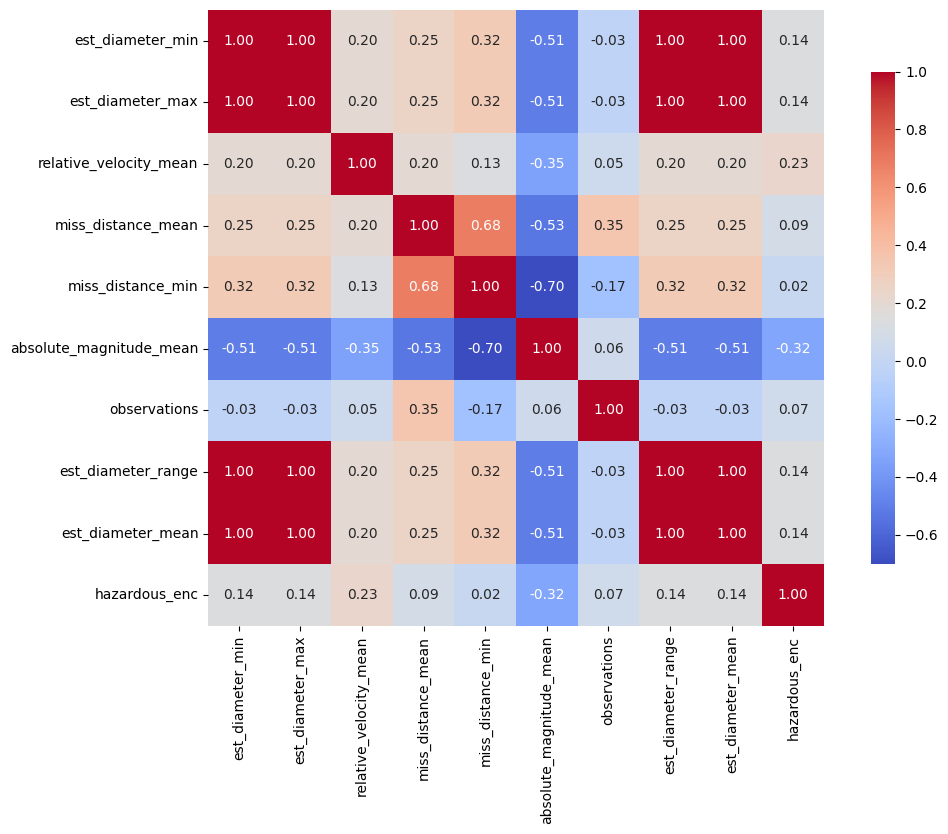

In [15]:
# Correlation Heatmap for numeric values (not including log columns)
log_columns = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p','relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p']
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=log_columns)
plt.figure(figsize=(12,8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

<Axes: >

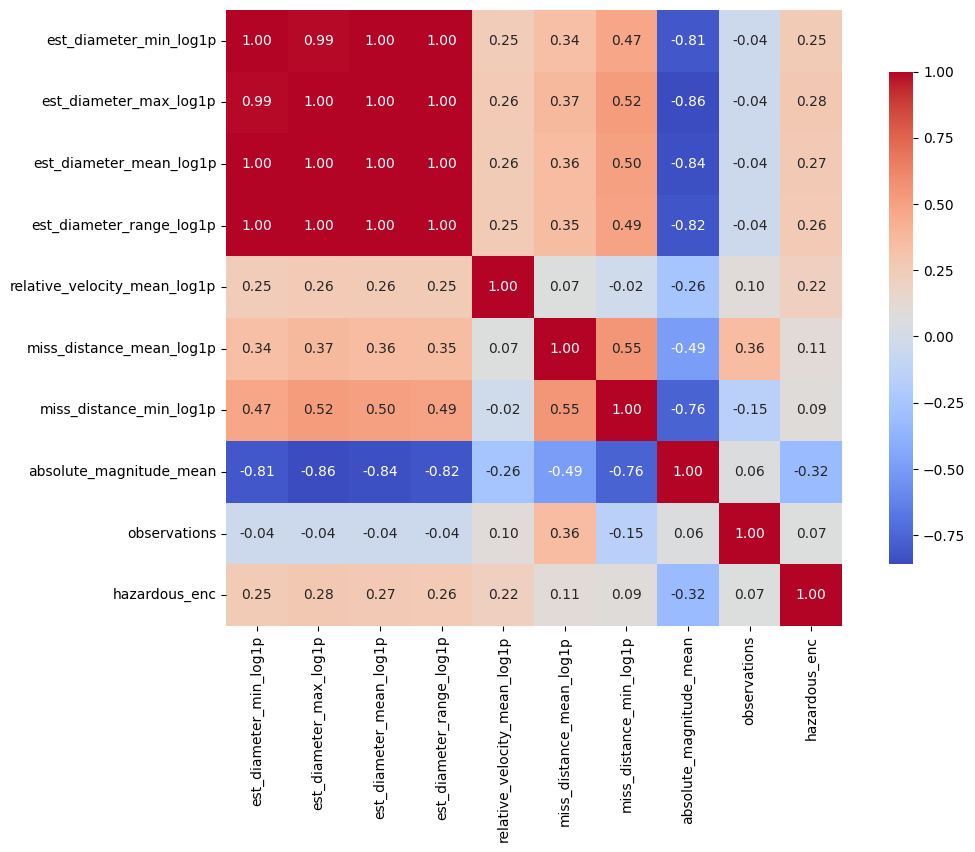

In [21]:
# Correlation Heatmap for numeric values for log columns (absolute magnitude and observations included for completeness)

log_columns = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p','relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p','absolute_magnitude_mean','observations', 'hazardous_enc']
df_log = df[log_columns]
plt.figure(figsize=(12,8))
correlation_matrix = df_log.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

From these heatmaps we can see that the strongest correlations for our hazardous variable are for our log diameter variables (max, mean, range, min in that order) and absolute velocity.
However this is not quite the full picture. Though absolute magnitude appears to show (quite strong) negative correlations with almost every other variable this is because it is a inverted scale. In fact absolute_magnitude_mean in reality is strongly related to diameter values, miss_distance and also the strongest correlation with hazardous variable. This gives support to some of our hypotheses.
Interestingly observations has only a weak correlation to hazardous status and a small negative correlation (when inverted) to magnitude.

Next let us check the distribution of our original key numeric variables against our principle target variable, hazardous.

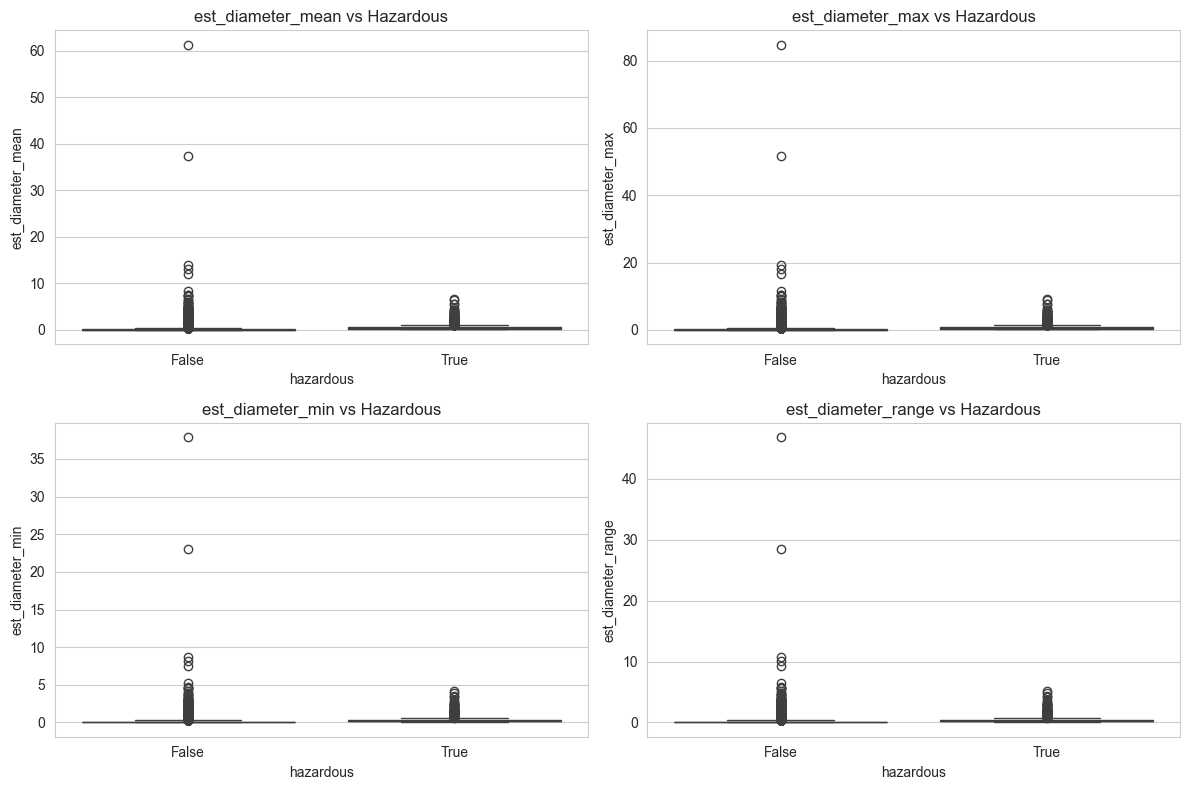

In [33]:
# -- Boxplots: Comparing Hazardous vs Non-Hazardous  (diameter) --
box_features = ["est_diameter_mean", 'est_diameter_max', 'est_diameter_min','est_diameter_range']
plt.figure(figsize=(12, 8))
for i, col in enumerate(box_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

These show us that the distribution of the diameter classes is very skewed with very wide ranges - from a few meters to over 80k (for max values)

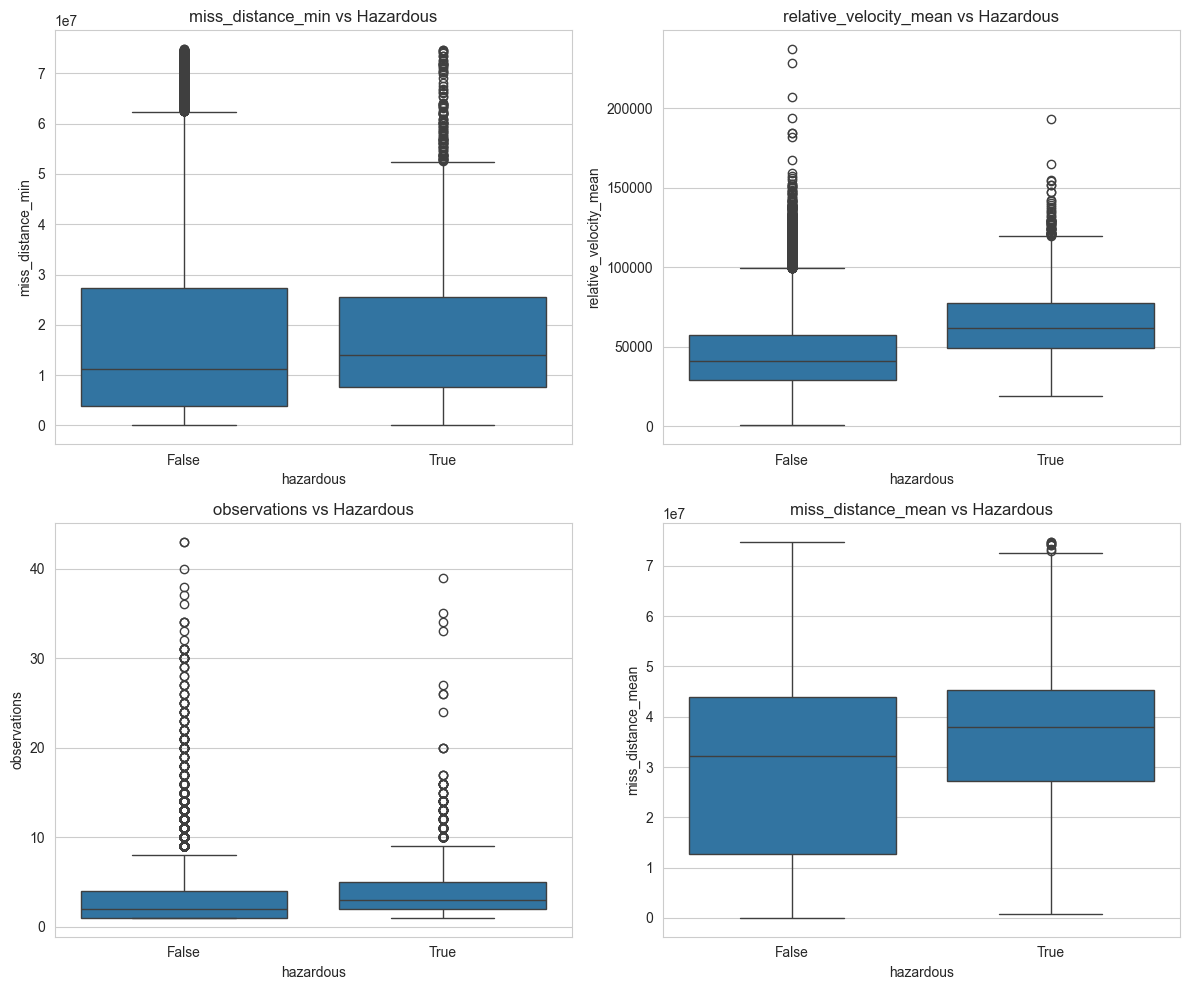

In [36]:

#boxplots for continuous numeric variables vs hazardous (not log transformed or diameter)
box_features2 = [ "miss_distance_min", "relative_velocity_mean", 'observations', 'miss_distance_mean']
plt.figure(figsize=(12, 10))
for i, col in enumerate(box_features2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

We can see from this the wide distribution of our data. There seems to be a small correlation between relative_velocity and hazardous status. There does not seem to be much correlation between miss distance and observations, though this may be distorted by the skewed data.

Next to examine magnitude we will use an inverted y-axis to get a clearer picture.

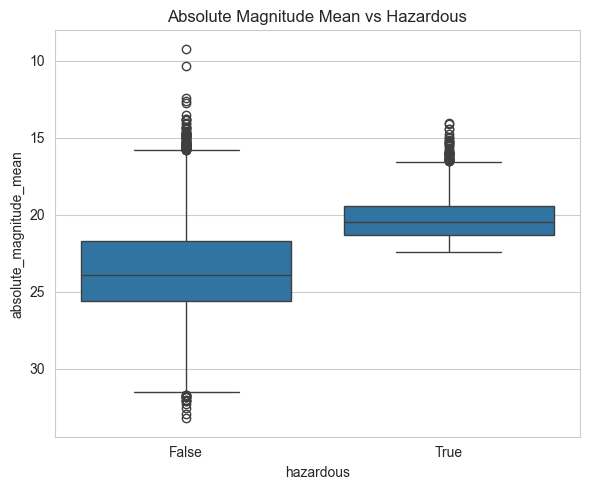

In [37]:
#To compensate for the inverted scale of absolute magnitude, we can invert the y-axis in the boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="hazardous", y='absolute_magnitude_mean')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title("Absolute Magnitude Mean vs Hazardous")
plt.tight_layout()
plt.show()

This does show that brighter objects may be more likely to be classified as hazardous.
This may be because:
* Brighter objects are likely to be larger and closer
* It may be easier to define the properties of brighter objects and hence classify them
A combination of both could be true.

Finally let us check our logarithmic features, firstly diameter values.

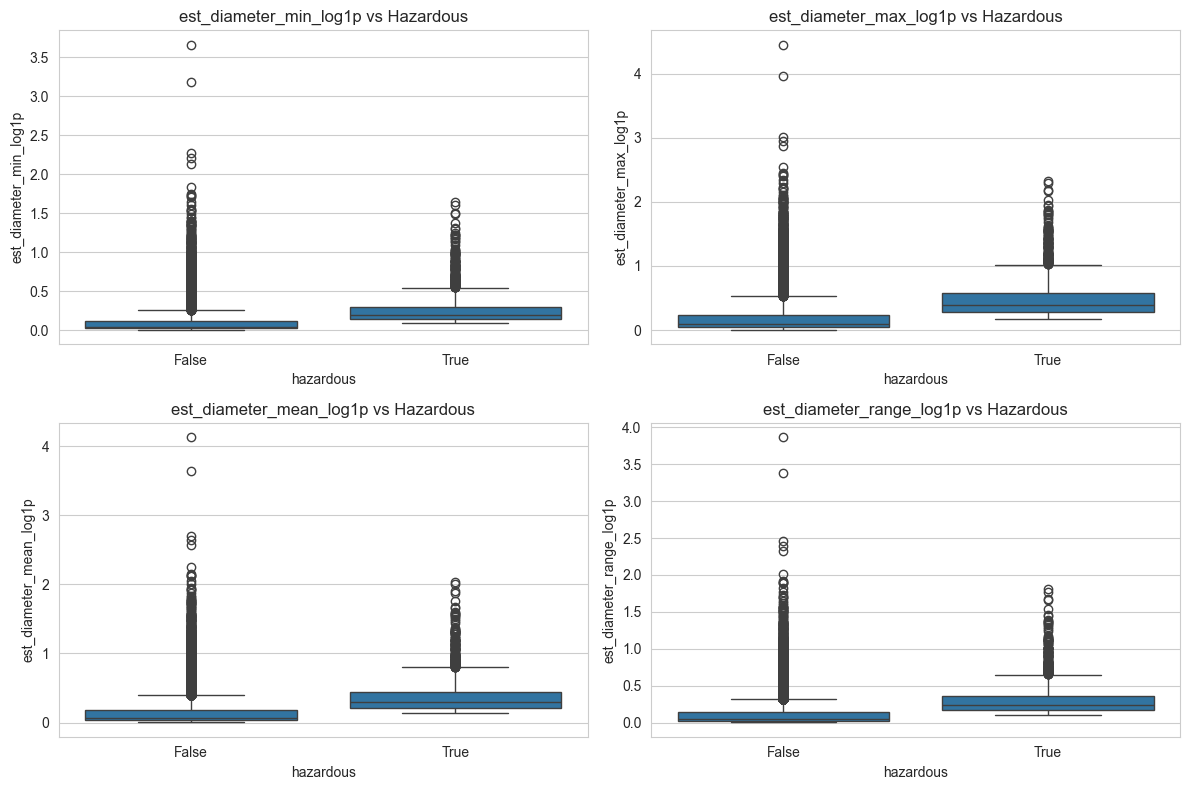

In [41]:
#-Boxplots: Comparing Hazardous vs Non-Hazardous  (diameterlog features) --
log_box_features = ['est_diameter_min_log1p','est_diameter_max_log1p','est_diameter_mean_log1p','est_diameter_range_log1p']
plt.figure(figsize=(12, 8))
for i, col in enumerate(log_box_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

From this we can see that there is a small but noticeable pattern - hazardous asteroids are likely to have higher than average diameters than those not considered hazardous.

Finally we can check our remaining logarithmic features.


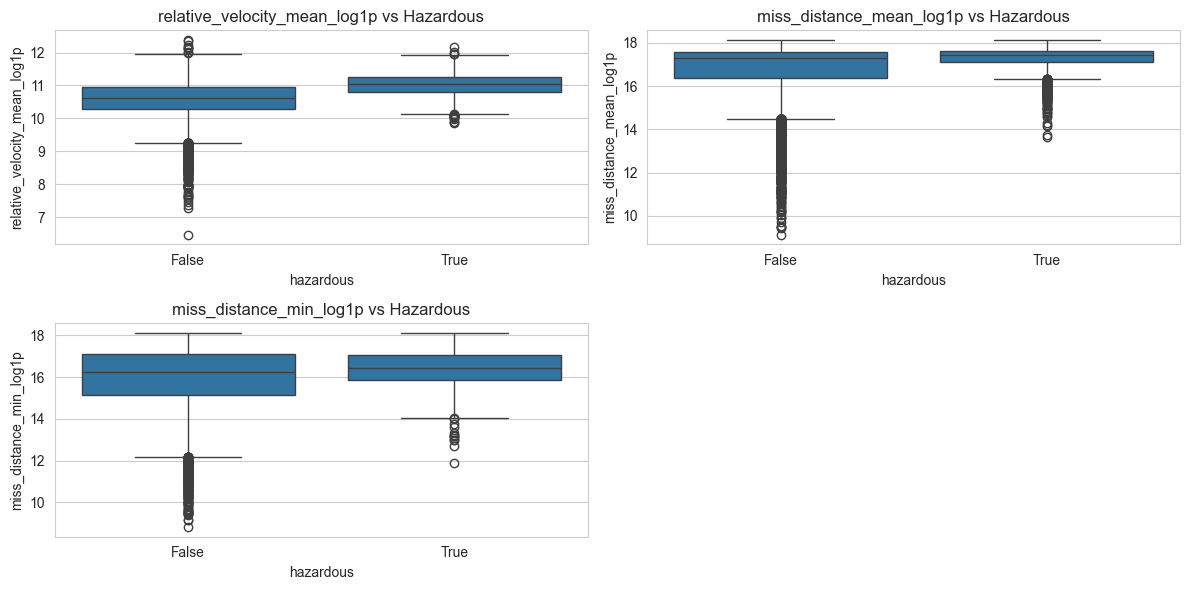

In [42]:
# Boxplots: Comparing Hazardous vs Non-Hazardous  (other log features) --
log_box_features2 = ['relative_velocity_mean_log1p','miss_distance_mean_log1p','miss_distance_min_log1p']
plt.figure(figsize=(12, 6))
for i, col in enumerate(log_box_features2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="hazardous", y=col)
    plt.title(f"{col} vs Hazardous")
plt.tight_layout()
plt.show()

Again we see no real connection between miss distance and hazardous status, with a small correlation between higher velocities and hazard status.

To summarise:
    * Features with some correlation to hazard status
        * absolute_magnitude
        * diameter (all measures)
        * relative_velocity
    * Features with no obvious or apparent correlation to miss distance
        * miss_distance ( across all values, with slight variations)
        * observations

This concludes the EDA section, next we will look at statistical tests to examine our hypotheses.

---

# Statistical Tests and Visualisations

Section 2 content

In [43]:
# sns.pairplot(
#     df,
#     vars=["est_diameter_mean", "miss_distance_min", "relative_velocity_mean"],
#     hue="hazardous",
#     diag_kind="kde",
#     height=4.2,
#     plot_kws={"alpha": 0.6}
# )
# plt.suptitle("Pairwise Relationships by Hazard Classification", y=1.02)
# plt.show()
# ['est_diameter_range', 'absolute_magnitude_mean', 'est_diameter_max', 'observations', 'miss_distance_mean', 'relative_velocity_mean', 'miss_distance_min', 'est_diameter_min', 'est_diameter_mean', 'hazardous', 'observations', 'miss_distance_mean', 'relative_velocity_mean', 'absolute_magnitude_mean']

#save for later use



---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---